In [20]:
import numpy as np
import datetime
import multiprocessing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from datetime import timedelta
import seaborn as sb
%matplotlib inline


In [21]:
import pandas as pd

# Path to your Excel file
file_path = r'C:\Users\hardi\OneDrive\Desktop\DSEM\BTC-PricePrediction.xlsx'

# Sheet names
sheet_names = ['BTC-2017min', 'BTC-2018min', 'BTC-2019min', 'BTC-2020min', 'BTC-2021min']

# Load data from multiple sheets into a dictionary of dataframes
dataframes = {sheet: pd.read_excel(file_path, sheet_name=sheet) for sheet in sheet_names}

# Combine all the dataframes into a single dataframe
df = pd.concat(dataframes.values(), ignore_index=True)

# Now you can access the data from all sheets in a single dataframe
print(df)


                 unix                date   symbol      open      high  \
0        1.483229e+09 2017-01-01 00:01:00  BTC/USD    966.34    966.34   
1        1.483229e+09 2017-01-01 00:02:00  BTC/USD    966.16    966.37   
2        1.483229e+09 2017-01-01 00:03:00  BTC/USD    966.37    966.37   
3        1.483229e+09 2017-01-01 00:04:00  BTC/USD    966.37    966.37   
4        1.483229e+09 2017-01-01 00:05:00  BTC/USD    966.43    966.43   
...               ...                 ...      ...       ...       ...   
2675296  1.646106e+09 2022-03-01 03:38:00  BTC/USD  43077.82  43077.82   
2675297  1.646106e+09 2022-03-01 03:39:00  BTC/USD  43035.16  43035.16   
2675298  1.646106e+09 2022-03-01 03:40:00  BTC/USD  43022.24  43022.24   
2675299  1.646106e+09 2022-03-01 03:41:00  BTC/USD  43018.23  43046.59   
2675300  1.646106e+09 2022-03-01 03:43:00  BTC/USD  43046.58  43046.58   

              low     close  Volume BTC    Volume USD  
0          966.34    966.34    7.610000   7353.847400  

In [22]:
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1.483229e+09,2017-01-01 00:01:00,BTC/USD,966.34,966.34,966.34,966.34,7.610000,7353.847400
1,1.483229e+09,2017-01-01 00:02:00,BTC/USD,966.16,966.37,966.16,966.37,8.087376,7815.397864
2,1.483229e+09,2017-01-01 00:03:00,BTC/USD,966.37,966.37,966.37,966.37,0.000000,0.000000
3,1.483229e+09,2017-01-01 00:04:00,BTC/USD,966.37,966.37,966.37,966.37,0.000000,0.000000
4,1.483229e+09,2017-01-01 00:05:00,BTC/USD,966.43,966.43,966.43,966.43,0.107000,103.408010


In [23]:
df.tail()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
2675296,1.646106e+09,2022-03-01 03:38:00,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143
2675297,1.646106e+09,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
2675298,1.646106e+09,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
2675299,1.646106e+09,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2675300,1.646106e+09,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000


In [24]:
df.shape

(2675301, 9)

In [25]:
#Check for missing values
df.isna().sum()

unix          1
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

In [26]:
#From the above result, we can see that there are no null values in the dataset

In [27]:
# Display information about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2675301 entries, 0 to 2675300
Data columns (total 9 columns):
 #   Column      Dtype         
---  ------      -----         
 0   unix        float64       
 1   date        datetime64[ns]
 2   symbol      object        
 3   open        float64       
 4   high        float64       
 5   low         float64       
 6   close       float64       
 7   Volume BTC  float64       
 8   Volume USD  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 183.7+ MB


In [28]:
# Display summary statistics for numeric columns in the DataFrame
df.describe()


,unix,open,high,low,close,Volume BTC,Volume USD
count,2.675300e+06,2.675301e+06,2.675301e+06,2.675301e+06,2.675301e+06,2.675301e+06,2.675301e+06
mean,1.564041e+09,1.620993e+04,1.621988e+04,1.619961e+04,1.620996e+04,6.130515e+00,7.079403e+04
std,4.707621e+07,1.742228e+04,1.743201e+04,1.741236e+04,1.742244e+04,1.629300e+01,2.030353e+05
min,1.483229e+09,7.520000e+02,7.528100e+02,7.513400e+02,7.520400e+02,0.000000e+00,0.000000e+00
25%,1.523358e+09,5.599040e+03,5.602000e+03,5.594980e+03,5.598880e+03,2.518954e-01,2.244546e+03
50%,1.563488e+09,8.703120e+03,8.709860e+03,8.696910e+03,8.702810e+03,1.467694e+00,1.466467e+04
75%,1.603617e+09,1.550000e+04,1.551000e+04,1.548793e+04,1.550000e+04,5.507826e+00,5.865908e+04
max,1.646106e+09,6.900000e+04,6.900000e+04,6.879999e+04,6.900000e+04,1.616060e+03,1.396792e+07


In [29]:
# Calculate the correlation coefficient between numeric columns
df.corr()


,unix,open,high,low,close,Volume BTC,Volume USD
unix,1.000000,0.779437,0.779403,0.779484,0.779437,-0.124351,0.132140
open,0.779437,1.000000,0.999999,0.999999,0.999999,-0.100665,0.193483
high,0.779403,0.999999,1.000000,0.999998,0.999999,-0.100439,0.193935
low,0.779484,0.999999,0.999998,1.000000,0.999999,-0.100938,0.192952
close,0.779437,0.999999,0.999999,0.999999,1.000000,-0.100687,0.193455
Volume BTC,-0.124351,-0.100665,-0.100439,-0.100938,-0.100687,1.000000,0.652679
Volume USD,0.132140,0.193483,0.193935,0.192952,0.193455,0.652679,1.000000


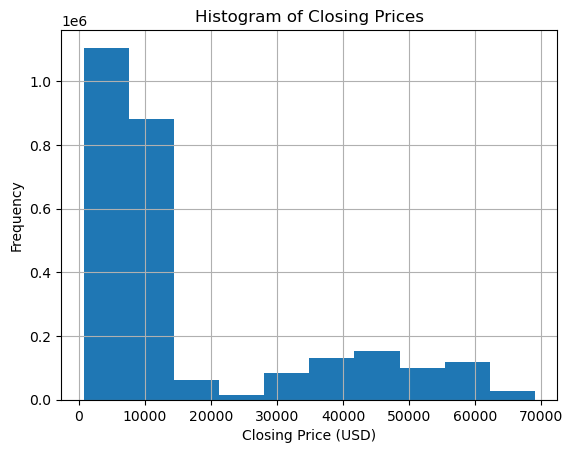

In [30]:
df['close'].hist()
plt.title('Histogram of Closing Prices')
plt.xlabel('Closing Price (USD)')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:>

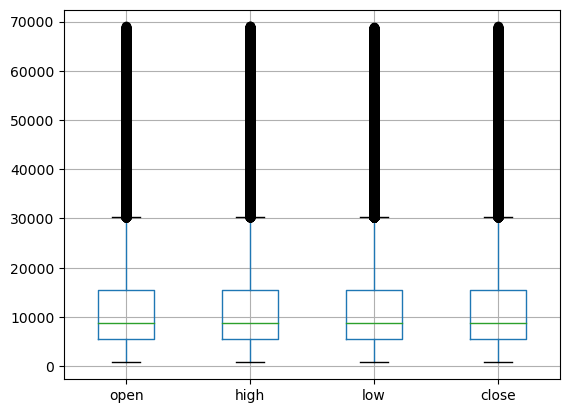

In [31]:
df.boxplot(column=['open', 'high', 'low', 'close'])

<AxesSubplot:xlabel='Volume BTC', ylabel='Volume USD'>

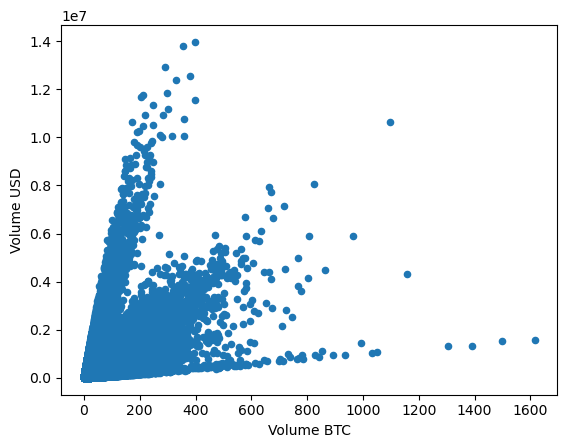

In [32]:
df.plot.scatter(x='Volume BTC', y='Volume USD')

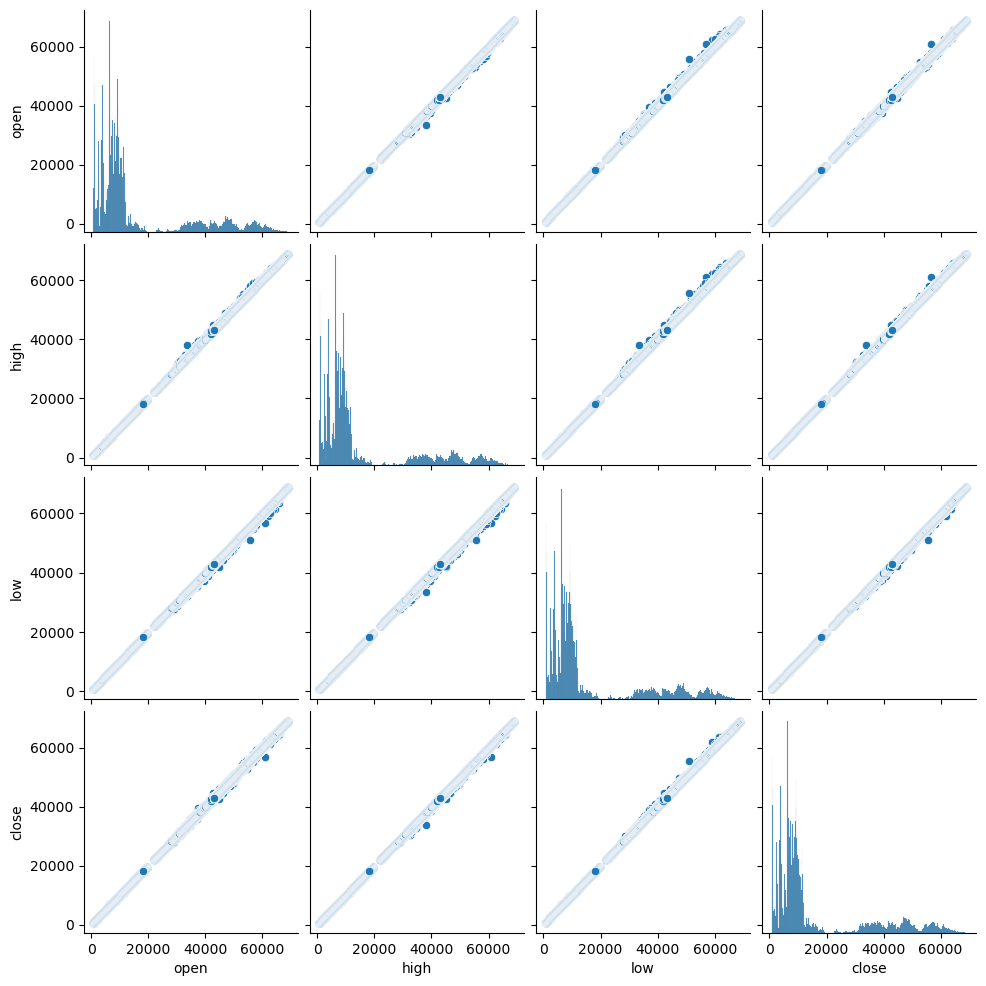

In [33]:
sns.pairplot(df[['open', 'high', 'low', 'close']])

In [44]:
# Get the minimum low and maximum high
data_low = df['low'].min()
data_high = df['high'].max()
data_open = df['open']
data_close = df['close']

# Print the results
print("Minimum Low: ", data_low)
print("Maximum High: ", data_high)

Minimum Low:  751.34
Maximum High:  69000.0


In [40]:
# Get the Mean Volume Traded
data_vol_BTC = df['Volume BTC'].mean()
print("Mean Volume BTC: ", data_vol_BTC)

Mean Volume BTC:  6.130515282883052


In [41]:
# Get the Min, Mean and Max Volume USD
min_volUSD_low = df['Volume USD'].min()
mean_volUSD = df['Volume USD'].mean()
max_volUSD_high = df['Volume USD'].max()
mean_close = df['close'].mean()

# Print the results
print("Minimum Volume USD: ", min_volUSD_low)
print("Mean Volume USD: ", mean_volUSD)
print("Maximum Volume USD: ", max_volUSD_high)
print("Mean Close: ", mean_close)

Minimum Volume USD:  0.0
Mean Volume USD:  70794.025116147
Maximum Volume USD:  13967923.0051402
Mean Close:  16209.956811594951


<AxesSubplot:>

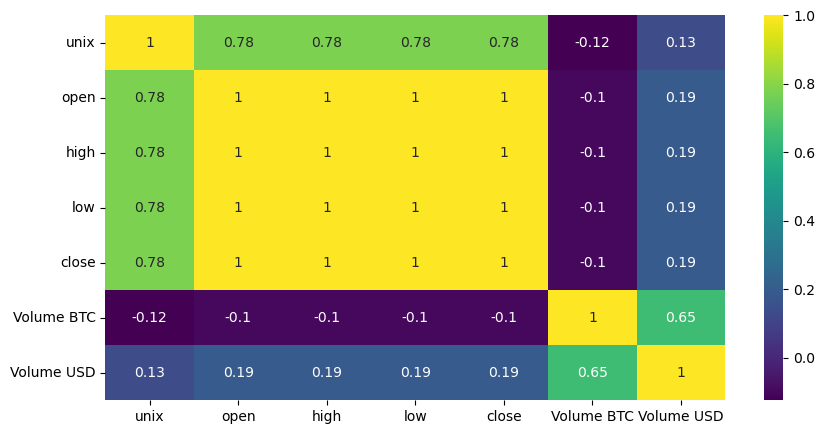

In [42]:
# Check for Corelation between Features
plt.figure(figsize=(10, 5))
sb.heatmap(df.corr(),yticklabels=True,annot=True,cbar=True,cmap='viridis')

C:\Users\hardi\AppData\Local\Temp\ipykernel_11624\1127999142.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data_year)


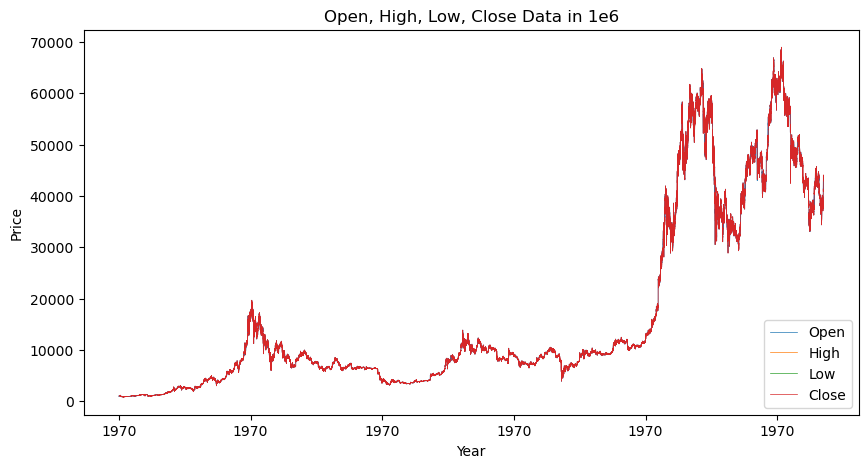

In [45]:
fig, ax = plt.subplots(figsize=(10,5))

# Convert the index to a datetime object and extract the year
data_year = pd.to_datetime(df.index).year

# Plot open, high, low, and close data on the same graph
ax.plot(data_open, label='Open',linewidth=0.5)
ax.plot(data_high, label='High',linewidth=0.5)
ax.plot(data_low, label='Low',linewidth=0.5)
ax.plot(data_close, label='Close',linewidth=0.5)

# Add a legend
ax.legend()

# Set x and y axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Price')

# Set the title of the graph
ax.set_title('Open, High, Low, Close Data in 1e6')

# Set the tick labels for the x-axis to show the year
ax.set_xticklabels(data_year)

# Show the plot
plt.show()


In [46]:
df.columns

Index(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC',
       'Volume USD'],
      dtype='object')

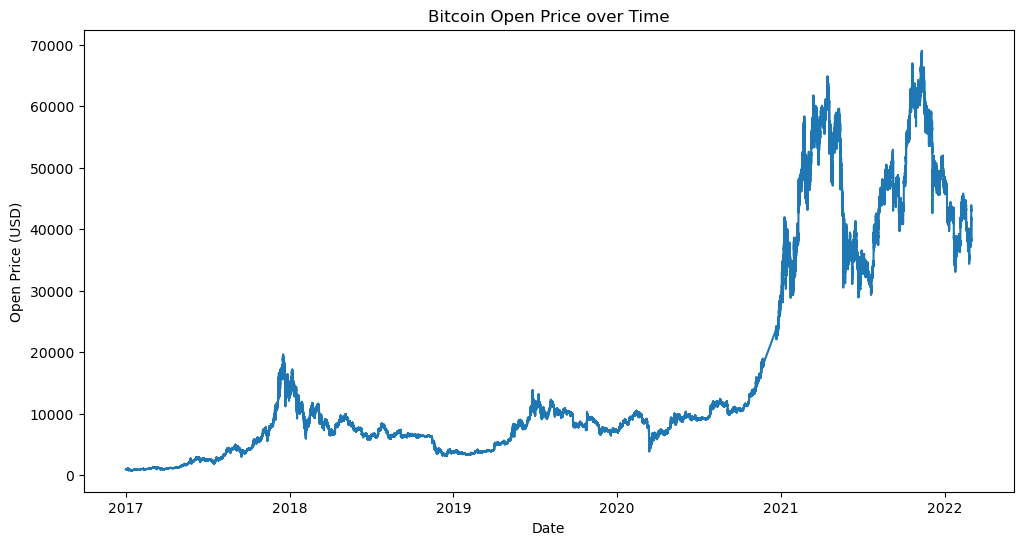

In [47]:
# Plot the Bitcoin open price over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['open'])
plt.xlabel('Date')
plt.ylabel('Open Price (USD)')
plt.title('Bitcoin Open Price over Time')
plt.show()


In [48]:
# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Create a new DataFrame with only the date and close columns
bitcoin_data = df[['date', 'close']]

# Calculate the number of minutes since the first date in the dataset
bitcoin_data['minutes_since'] = (bitcoin_data['date'] - bitcoin_data['date'].min()) / pd.Timedelta('1 minute')


C:\Users\hardi\AppData\Local\Temp\ipykernel_11624\3740437709.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_data['minutes_since'] = (bitcoin_data['date'] - bitcoin_data['date'].min()) / pd.Timedelta('1 minute')


In [49]:
bitcoin_data = df[['date', 'close']].copy()

# Calculate the number of minutes since the first date in the dataset
bitcoin_data['minutes_since'] = (bitcoin_data['date'] - bitcoin_data['date'].min()) / pd.Timedelta('1 minute')


In [50]:
# Split the data into training and testing sets
X = bitcoin_data[['minutes_since']]
y = bitcoin_data['close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [52]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [53]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 119270830.75665203
R-squared: 0.608056752138271


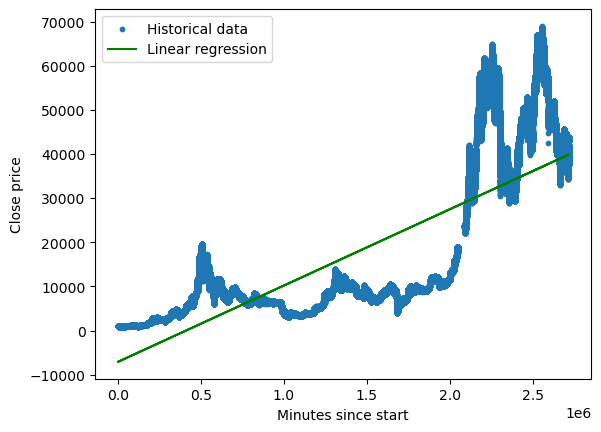

In [54]:
# Visualize the fitted model
plt.scatter(X_train, y_train, s=10, label='Historical data')
plt.xlabel('Minutes since start')
plt.ylabel('Close price')

plt.plot(X_test, y_pred, color='g', label='Linear regression')

plt.legend()
plt.show()

In [55]:
# Calculate future data
last_date = bitcoin_data['date'].max()
end_date = '2022-12-31 23:59:00'
future_timestamps = pd.date_range(start=last_date, end=end_date, freq='1T', closed='right')
future_minutes_since = (future_timestamps - bitcoin_data['date'].min()) / pd.Timedelta('1 minute')
future_minutes_since = future_minutes_since.to_numpy().reshape(-1, 1)
future_close_prices = model.predict(future_minutes_since)

C:\Users\hardi\AppData\Local\Temp\ipykernel_11624\2221979898.py:4: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_timestamps = pd.date_range(start=last_date, end=end_date, freq='1T', closed='right')
C:\Users\hardi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


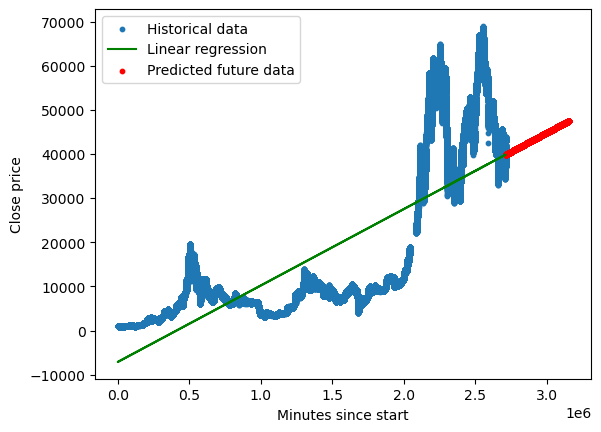

In [56]:
# Visualize historical data, fitted model, and future predictions
plt.scatter(X_train, y_train, s=10, label='Historical data')
plt.xlabel('Minutes since start')
plt.ylabel('Close price')

plt.plot(X_test, y_pred, color='g', label='Linear regression')
plt.scatter(future_minutes_since, future_close_prices, s=10, color='r', label='Predicted future data')

plt.legend()
plt.show()

In [57]:
#Polynomial Regression

In [58]:
X = bitcoin_data['minutes_since'].values.reshape(-1, 1)
y = bitcoin_data['close'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
# Choose the degree of the polynomial
degree = 4

# Transform the input features to a polynomial form
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Train a linear regression model on the transformed features
model = LinearRegression()
model.fit(X_train_poly, y_train)


LinearRegression()

In [60]:
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_pred))
print("Coefficient of determination (R^2): %.2f" % r2_score(y_test, y_test_pred))


Mean squared error: 60187071.89
Coefficient of determination (R^2): 0.80


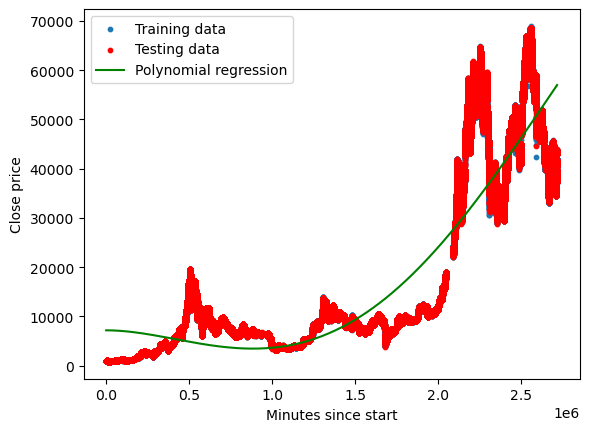

In [61]:
plt.scatter(X_train, y_train, s=10, label='Training data')
plt.scatter(X_test, y_test, s=10, label='Testing data', color='r')
plt.xlabel('Minutes since start')
plt.ylabel('Close price')

# Generate a range of x values for the fitted curve
X_plot = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)

# Predict the close prices using the model
y_plot = model.predict(X_plot_poly)

plt.plot(X_plot, y_plot, color='g', label='Polynomial regression')
plt.legend()
plt.show()


In [81]:
# Get the last date in the dataset
last_date = bitcoin_data['date'].max()


# Set the number of minutes into the future you want to predict
end_date = pd.Timestamp('2022-12-31 23:59:00')
minutes_to_predict = int((end_date - last_date) / pd.Timedelta('1 minute'))

# Generate future timestamps at 1-minute intervals
future_timestamps = pd.date_range(start=last_date, periods=minutes_to_predict, freq='1T', closed='right')


C:\Users\hardi\AppData\Local\Temp\ipykernel_11624\3477286589.py:10: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_timestamps = pd.date_range(start=last_date, periods=minutes_to_predict, freq='1T', closed='right')


In [63]:
# Calculate the number of minutes since the first date for each future timestamp
future_minutes_since = (future_timestamps - bitcoin_data['date'].min()) / pd.Timedelta('1 minute')
future_minutes_since = future_minutes_since.to_numpy().reshape(-1, 1)


In [64]:
# Transform the future_minutes_since to polynomial features
future_minutes_since_poly = poly_features.transform(future_minutes_since)


In [65]:
# Predict future close prices using the model
future_close_prices = model.predict(future_minutes_since_poly)


In [66]:
# Create a DataFrame with the future timestamps and predicted close prices
future_data = pd.DataFrame({'date': future_timestamps, 'predicted_close': future_close_prices})


C:\Users\hardi\AppData\Local\Temp\ipykernel_11624\4184442456.py:10: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_timestamps = pd.date_range(start=last_date, end=end_date, freq='1T', closed='right')


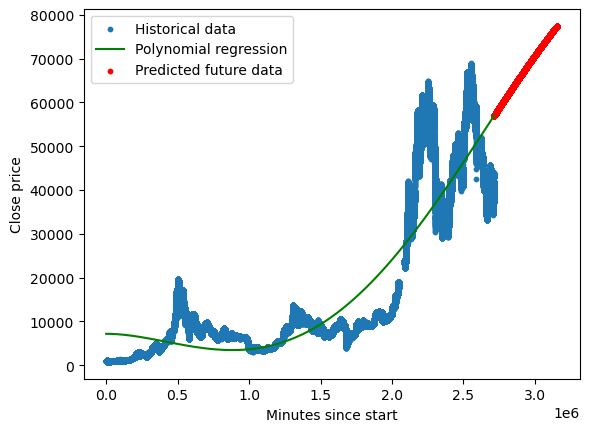

In [67]:
# Plot historical data
plt.scatter(X_train, y_train, s=10, label='Historical data')
plt.xlabel('Minutes since start')
plt.ylabel('Close price')

# Plot the fitted curve
plt.plot(X_plot, y_plot, color='g', label='Polynomial regression')

# Calculate future data
future_timestamps = pd.date_range(start=last_date, end=end_date, freq='1T', closed='right')
future_minutes_since = (future_timestamps - bitcoin_data['date'].min()) / pd.Timedelta('1 minute')
future_minutes_since = future_minutes_since.to_numpy().reshape(-1, 1)
future_minutes_since_poly = poly_features.transform(future_minutes_since)
future_close_prices = model.predict(future_minutes_since_poly)

# Plot future data
plt.scatter(future_minutes_since, future_close_prices, s=10, color='r', label='Predicted future data')

plt.legend()
plt.show()


C:\Users\hardi\AppData\Local\Temp\ipykernel_11624\1537631519.py:2: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_timestamps = pd.date_range(start=last_date, end=end_date, freq='1T', closed='right')


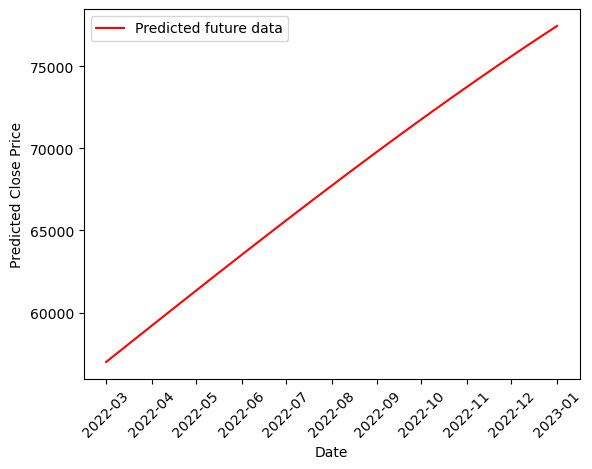

In [68]:
# Calculate future data
future_timestamps = pd.date_range(start=last_date, end=end_date, freq='1T', closed='right')
future_minutes_since = (future_timestamps - bitcoin_data['date'].min()) / pd.Timedelta('1 minute')
future_minutes_since = future_minutes_since.to_numpy().reshape(-1, 1)
future_minutes_since_poly = poly_features.transform(future_minutes_since)
future_close_prices = model.predict(future_minutes_since_poly)

fig, ax = plt.subplots()

# Plot future data with a line plot
ax.plot(future_timestamps, future_close_prices, color='r', label='Predicted future data')

ax.set_xlabel('Date')
ax.set_ylabel('Predicted Close Price')
ax.legend()
plt.xticks(rotation=45)
plt.show()


In [69]:
#SVM

In [70]:
# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set the date column as index
df.set_index('date', inplace=True)

# Resample the data at a larger interval (e.g., hourly)
data_resampled = df.resample('1H').mean()

In [71]:
def create_lag_features(df, n_lags):
    df_lagged = df.copy()
    for i in range(1, n_lags + 1):
        df_lagged[f'lag_{i}'] = df_lagged['close'].shift(i)
    return df_lagged

n_lags = 5
data_lagged = create_lag_features(data_resampled, n_lags)
data_lagged.dropna(inplace=True)

In [72]:
# Split the data into train and test sets
X = data_lagged.drop(columns=['unix', 'open', 'high', 'low', 'close', 'Volume BTC', 'Volume USD']).values
y = data_lagged['close'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [73]:
# Normalize the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
svm_model = SVR(kernel='rbf', C=1e3, gamma=0.1)
svm_model.fit(X_train_scaled, y_train)

SVR(C=1000.0, gamma=0.1)

In [75]:
y_pred = svm_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 7115225.82677225


In [77]:
y_pred = svm_model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f'R-squared value: {r2}')

R-squared value: 0.9166939316736586
